In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = '/content/Malware dataset.csv'
data = pd.read_csv(url)

data.head()


,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [4]:
# Display basic information about the dataset
data.info()

# Display summary statistics
data.describe()

# Check for missing values
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   hash               100000 non-null  object
 1   millisecond        100000 non-null  int64 
 2   classification     100000 non-null  object
 3   state              100000 non-null  int64 
 4   usage_counter      100000 non-null  int64 
 5   prio               100000 non-null  int64 
 6   static_prio        100000 non-null  int64 
 7   normal_prio        100000 non-null  int64 
 8   policy             100000 non-null  int64 
 9   vm_pgoff           100000 non-null  int64 
 10  vm_truncate_count  100000 non-null  int64 
 11  task_size          100000 non-null  int64 
 12  cached_hole_size   100000 non-null  int64 
 13  free_area_cache    100000 non-null  int64 
 14  mm_users           100000 non-null  int64 
 15  map_count          100000 non-null  int64 
 16  hiwater_rss        10

hash                 0
millisecond          0
classification       0
state                0
usage_counter        0
prio                 0
static_prio          0
normal_prio          0
policy               0
vm_pgoff             0
vm_truncate_count    0
task_size            0
cached_hole_size     0
free_area_cache      0
mm_users             0
map_count            0
hiwater_rss          0
total_vm             0
shared_vm            0
exec_vm              0
reserved_vm          0
nr_ptes              0
end_data             0
last_interval        0
nvcsw                0
nivcsw               0
min_flt              0
maj_flt              0
fs_excl_counter      0
lock                 0
utime                0
stime                0
gtime                0
cgtime               0
signal_nvcsw         0
dtype: int64

In [5]:
data["classification"].value_counts()

malware    50000
benign     50000
Name: classification, dtype: int64

In [6]:
data['classification'] = data.classification.map({'benign':0, 'malware':1})

# **EDA**

**Visualization**

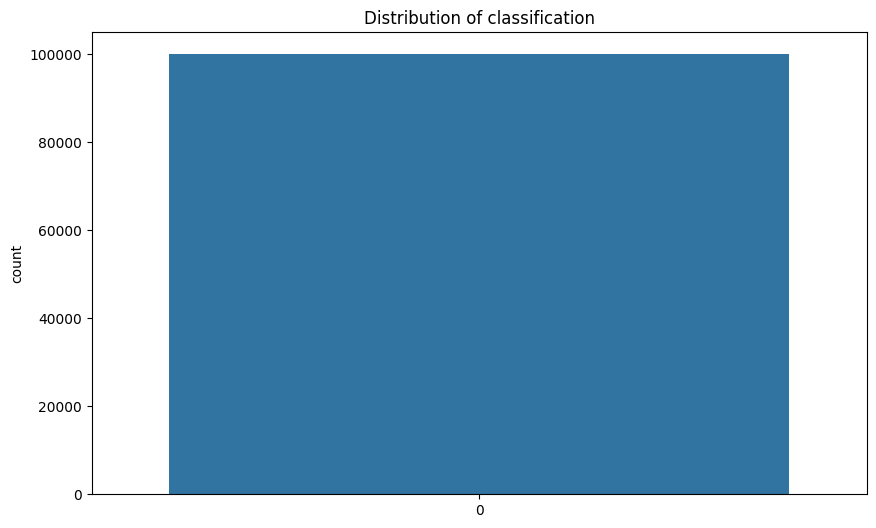

<ipython-input-7-829aa34f1e1f>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


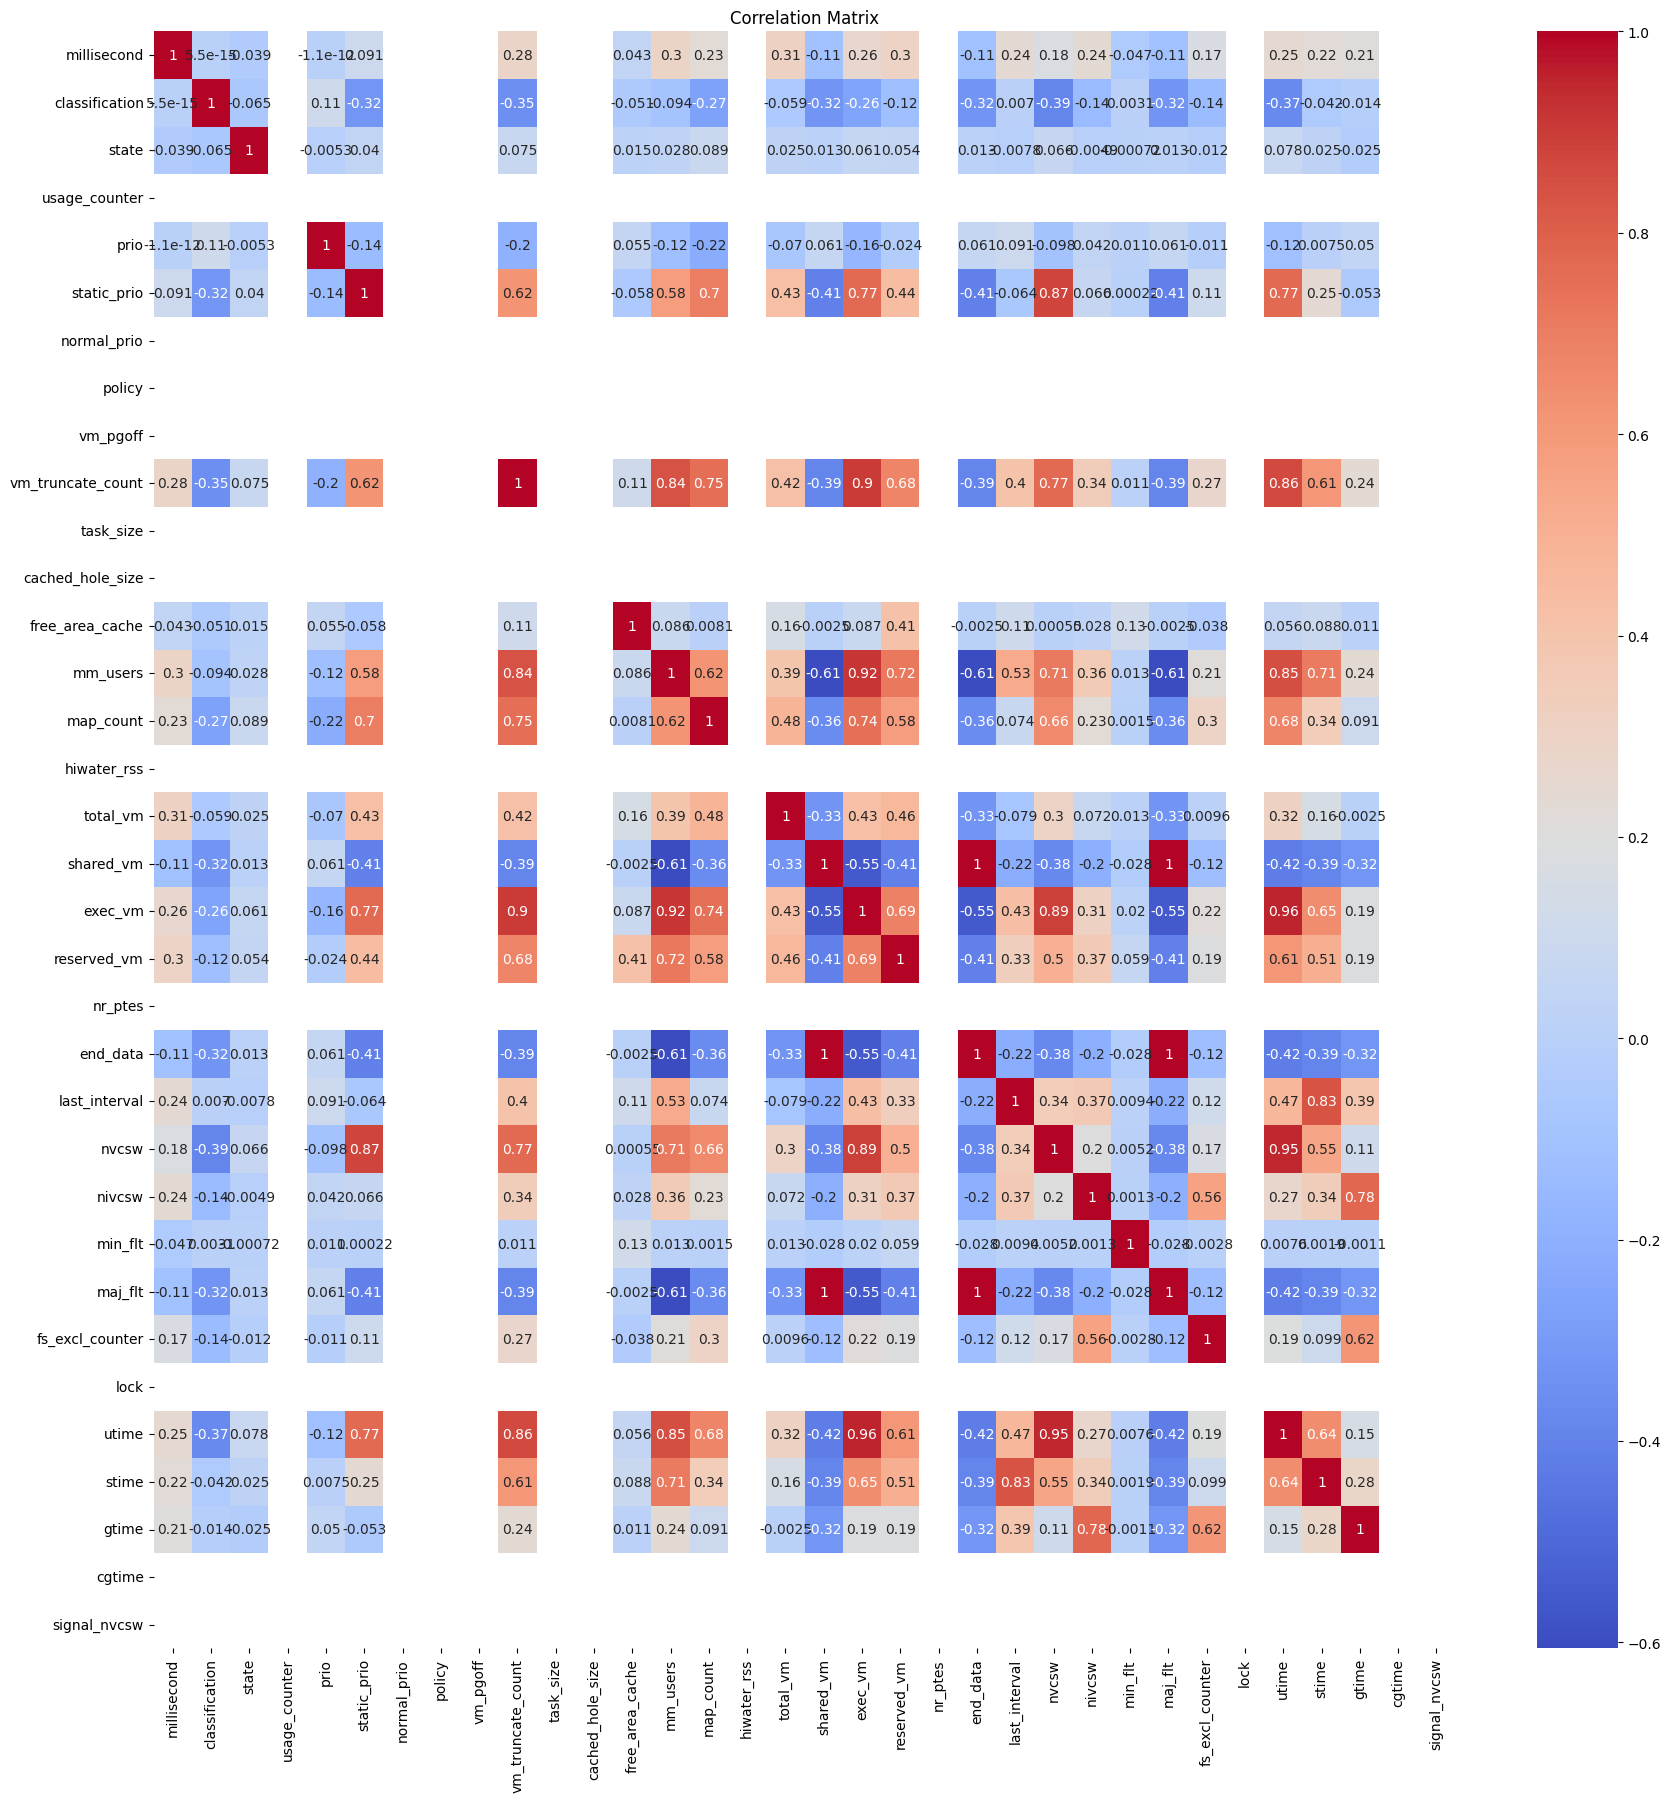

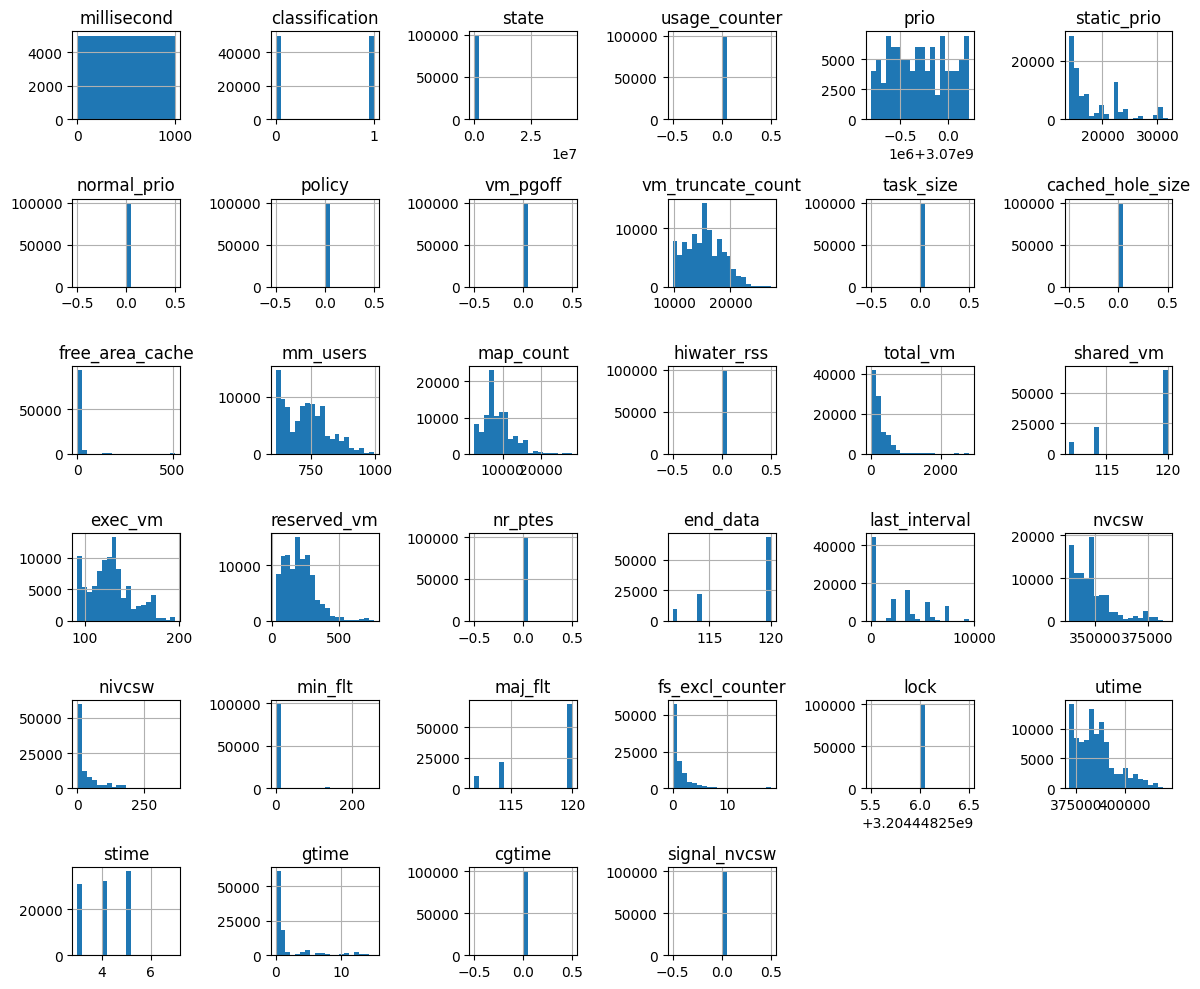

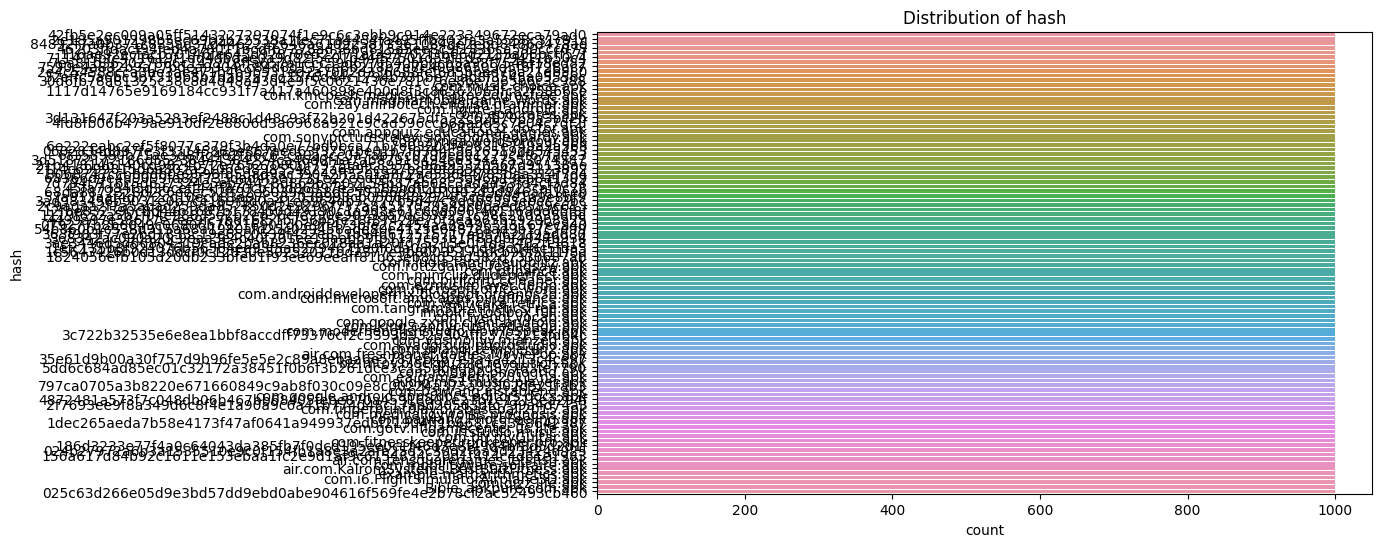

In [7]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of target variable
plt.figure(figsize=(10,6))
sns.countplot(data['classification'])  # Replace 'target_variable' with the name of your target variable
plt.title('Distribution of classification')
plt.show()

# Plot correlation matrix
plt.figure(figsize=(21,21))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Plot distribution of numerical features
data.select_dtypes(include='number').hist(figsize=(12,10), bins=20)
plt.tight_layout()
plt.show()

# Plot distribution of categorical features
categorical_features = data.select_dtypes(include='object').columns.tolist()
for feature in categorical_features:
    plt.figure(figsize=(10,6))
    sns.countplot(y=data[feature], order = data[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.show()


In [8]:
# Calculate and display summary statistics for numerical features
data.describe()

# Calculate and display mode for categorical features
data[categorical_features].mode()


,hash
0,024b27972a6b3a1535510e9c0f154fb1a8e3a2afb25d5c...
1,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...
2,0602834d897fe3f3314586ae867aed63f3757be01b7f03...
3,079277b8b6049c06806b79216901d0e9ff473bfe2c2454...
4,1117d14765e9169184cc931f7a417a460898e4b0d8f3c8...
...,...
95,com.venticake.retrica.apk
96,com.zayaninfotech.english.grammar.apk
97,com.zynga.wordsontour.apk
98,example.matharithmetics.apk


# **Data Preprocessing and Cleaning**

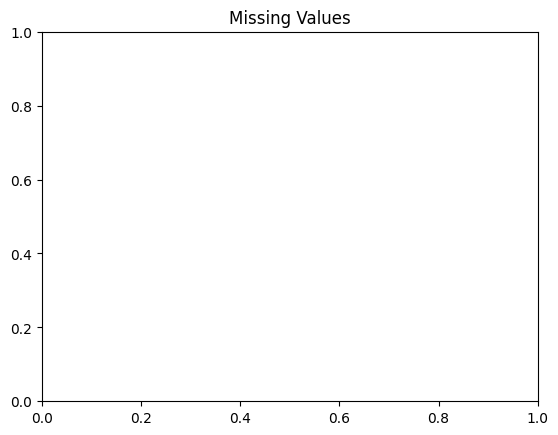

In [9]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
#missing_values.plot.bar(figsize=(10,6))
plt.title('Missing Values')
plt.show()

# Handle missing values
# For numerical features, you can fill missing values with mean, median, or mode
data['total_vm'] = data['total_vm'].fillna(data['total_vm'].mean())

# For categorical features, you can fill missing values with mode or a specific value
data['classification'] = data['classification'].fillna(data['classification'].mode()[0])


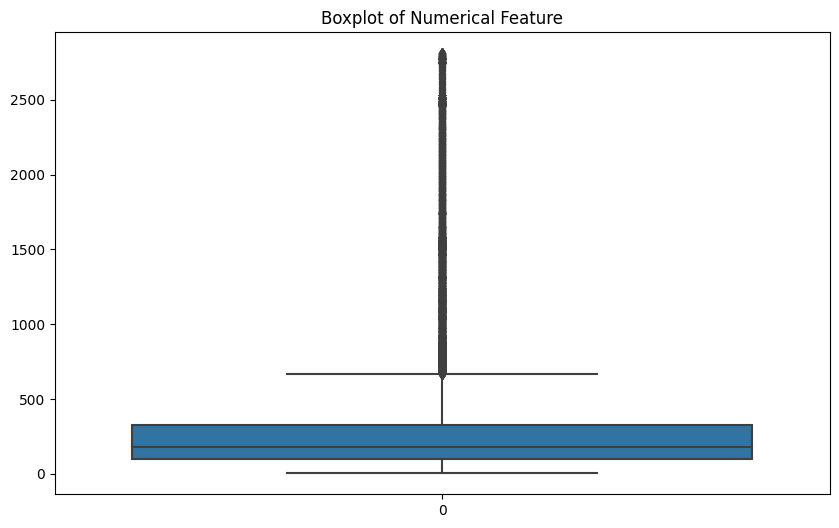

In [10]:
# Detect and handle outliers
# For numerical features, you can use boxplot to visualize outliers
plt.figure(figsize=(10,6))
sns.boxplot(data['total_vm'])
plt.title('Boxplot of Numerical Feature')
plt.show()

# Handle outliers
# You can remove outliers or replace them with specific values
# data = data[data['total_vm'] < upper_limit]  # Replace 'upper_limit' with the appropriate value


In [11]:
# Convert categorical features to numerical features
data['classification'] = data['classification'].astype('category').cat.codes


# **Feature Engineering and Selection**
1. Clustering:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


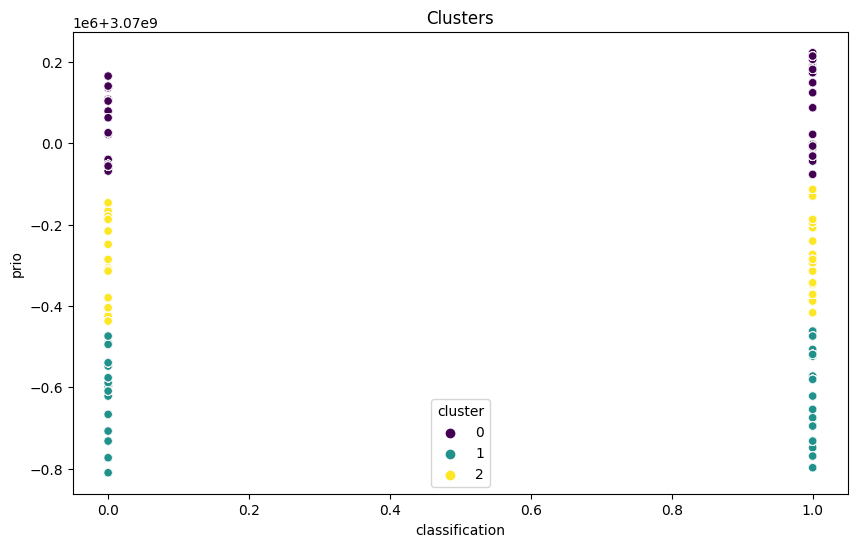

In [12]:
# Use KMeans clustering to cluster similar data points
from sklearn.cluster import KMeans

# Select features for clustering
X_cluster = data[['classification', 'prio']]  # Replace 'feature1' and 'feature2' with the names of features you want to use for clustering

# Fit a KMeans model
kmeans = KMeans(n_clusters=3)  # Replace '3' with the number of clusters you want to create
data['cluster'] = kmeans.fit_predict(X_cluster)

# Plot clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='classification', y='prio', hue='cluster', data=data, palette='viridis')
plt.title('Clusters')
plt.show()


2. Anomaly Detection:

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


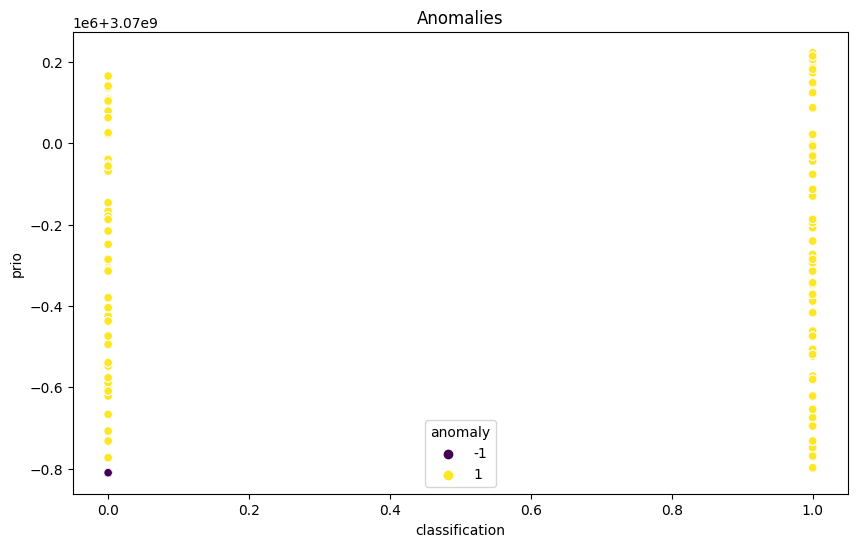

In [14]:
# Use Isolation Forest for anomaly detection
from sklearn.ensemble import IsolationForest

# Fit an Isolation Forest model
model = IsolationForest(contamination=0.01)  # Replace '0.01' with the proportion of outliers in the dataset
data['anomaly'] = model.fit_predict(X_cluster)

# Plot anomalies
plt.figure(figsize=(10,6))
sns.scatterplot(x='classification', y='prio', hue='anomaly', data=data, palette='viridis')
plt.title('Anomalies')
plt.show()


In [15]:
# Handle missing values
# For numerical features, you can fill missing values with mean, median, or mode
data['total_vm'] = data['total_vm'].fillna(data['total_vm'].mean())

# For categorical features, you can fill missing values with mode or a specific value
data['classification'] = data['classification'].fillna(data['classification'].mode()[0])


In [17]:
pip install h2o


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=fb2c4888013d04ce489cb1b65cb1921daedbd595329e731fe00478923b7a402d
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built h2o


In [18]:
# Use AutoML to build machine learning models
# You can use popular AutoML libraries like H2O, TPOT, or Auto-sklearn
# Here's an example of how to use H2O for AutoML

import h2o
from h2o.automl import H2OAutoML

# Initialize H2O
h2o.init()

# Convert the data to an H2O frame
h2o_data = h2o.H2OFrame(data)

# Split the data into training and testing sets
train, test = h2o_data.split_frame(ratios=[0.8])

# Identify predictors and response
x = train.columns
y = 'classification'  # Replace 'target_variable' with the name of your target variable
x.remove(y)

# Run H2O AutoML
aml = H2OAutoML(max_runtime_secs=600, seed=1)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpykrbroh8
  JVM stdout: /tmp/tmpykrbroh8/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpykrbroh8/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_unknownUser_8h3qop
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
04:08:18.828: _train param, Dropping bad and constant columns: [cached_hole_size, hiwater_rss, cgtime, task_size, usage_counter, nr_ptes, vm_pgoff, lock, signal_nvcsw, normal_prio, policy]
04:08:18.829: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█████████████████
04:10:52.233: _train param, Dropping bad and constant columns: [cached_hole_size, hiwater_rss, cgtime, task_size, usage_counter, nr_ptes, vm_pgoff, lock, signal_nvcsw, normal_prio, policy]
04:10:52.233: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


04:10:54.614: _train pa

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_3_AutoML_1_20231028_40817,0.000175088,3.06559e-08,1.30033e-05,0.000124276,3.06559e-08
StackedEnsemble_AllModels_1_AutoML_1_20231028_40817,0.000206352,4.2581e-08,0.000116178,0.00015046,4.2581e-08
StackedEnsemble_BestOfFamily_2_AutoML_1_20231028_40817,0.000206558,4.26664e-08,0.000116176,0.000150567,4.26664e-08
GBM_2_AutoML_1_20231028_40817,0.00100413,1.00828e-06,0.000116695,0.000605812,1.00828e-06
DRF_1_AutoML_1_20231028_40817,0.00111971,1.25376e-06,3.1344e-05,0.000658529,1.25376e-06
GBM_4_AutoML_1_20231028_40817,0.00130558,1.70453e-06,6.39464e-05,0.00068103,1.70453e-06
GBM_1_AutoML_1_20231028_40817,0.00171883,2.95437e-06,0.00034674,0.0013141,2.95437e-06
StackedEnsemble_BestOfFamily_1_AutoML_1_20231028_40817,0.00172218,2.96592e-06,0.000403581,0.00131533,2.96592e-06
XGBoost_2_AutoML_1_20231028_40817,0.00202133,4.08579e-06,0.000238855,0.00118169,4.08579e-06
GLM_1_AutoML_1_20231028_40817,0.00374942,1.40581e-05,0.00244061,0.00329501,1.40581e-05


In [20]:
# Drop 'hash' column
data = data.drop('hash', axis=1)

# Encode 'classification' as target variable
data['classification'] = data['classification'].astype('category').cat.codes

# Prepare the data for modeling
X = data.drop('classification', axis=1)
y = data['classification']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Random Forest ensemble model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))


Accuracy: 100.00%
